# Thư viện

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Hàm đọc ảnh

In [3]:
input_file = 'women.png'
image = Image.open(input_file)
image = np.array(image)

input_file_2 = 'women.png'
image_2 = Image.open(input_file_2)
image_2 = np.array(image_2)

## 1.Thay đổi độ sáng cho ảnh

In [43]:
def adjust_brightness(img, brightness):
    return np.uint8(np.clip(img + np.array([brightness], dtype=np.int16), 0, 255))

In [48]:
# Brightness: -255 tới 255
brightness = 123
result = adjust_brightness(image, brightness)

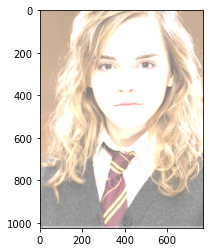

In [49]:
# Show ảnh trên notebook
plt.imshow(result)

In [51]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_brightness' + '.png'
Image.fromarray(result).save(output_file)

## 2.Thay đổi độ tương phản

In [14]:
def adjust_contrast(img, contrast):
    contrast = np.clip(float(contrast), -255, 255)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    return np.uint8(np.clip(factor * (img.astype(float) - 128) + 128, 0, 255))

In [15]:
# Contrast: -255 tới 255
contrast = 123
result = adjust_contrast(image, contrast)

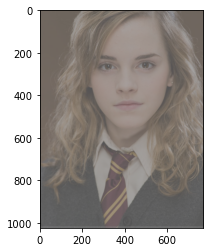

In [16]:
# Show ảnh trên notebook
plt.imshow(result)

In [17]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_contrast' + '.png'
Image.fromarray(result).save(output_file)

## 3.Lật ảnh (ngang - dọc) 

In [72]:
def flip(img, direction):
    return np.flipud(img) if direction == 'horizontal' else np.fliplr(img)

In [73]:
# Direction: 'vertical' hoặc 'horizontal'
direction = 'horizontal'
result = flip(image, direction)

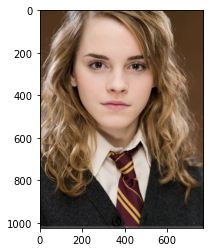

In [74]:
# Show ảnh trên notebook
plt.imshow(result)

In [52]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_flip' + '.png'
Image.fromarray(result).save(output_file)

## 4.Chuyển đổi ảnh RGB thành ảnh xám

In [54]:
def to_grayscale(img, weight):
    return np.uint8(np.dot(img[..., :3], weight))

In [55]:
# Weight: Dưới đây là công thức luma của các ảnh thuộc format CCIR 601
weight = [0.299 , 0.587, 0.114]
result = to_grayscale(image, weight)

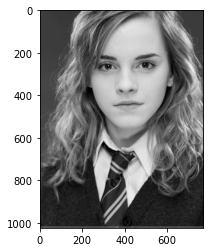

In [56]:
# Show ảnh trên notebook
    # cmap='gray': để show ảnh với 3 kênh màu khi ảnh xám chỉ có duy nhất 1 kênh
plt.imshow(result, cmap='gray')

In [57]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_grayscale' + '.png'
Image.fromarray(result).save(output_file, cmap='gray')

## 5.Chồng 2 ảnh cùng kích thước (chỉ làm trên ảnh xám)

In [58]:
def blend(img_1, img_2, alpha):
    return np.uint8(alpha * img_1.astype(float) + (1 - alpha) * img_2.astype(float))

In [59]:
# Chuyển input thành ảnh xám, tuy nhiên vẫn có thể thực hiện được trên ảnh màu
gray_image_1 = to_grayscale(image, weight)
gray_image_2 = flip(to_grayscale(image_2, weight), 'horizontal')

In [60]:
# Alpha: 0.0 tới 1.0
alpha = 0.7
result = blend(gray_image_1, gray_image_2, alpha)

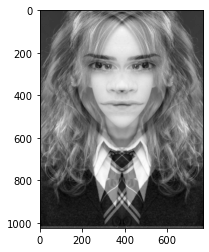

In [61]:
# Show ảnh trên notebook
plt.imshow(result, cmap='gray')

In [63]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_blend' + '.png'
Image.fromarray(result).save(output_file, cmap='gray')

## 6.Làm mờ ảnh

In [64]:
def Gaussian_func(x, sigma):
    return np.array(1 / (np.sqrt(2 * np.pi) * sigma) * (np.exp(-np.power(x / sigma, 2) / 2)))

In [65]:
def calc_Gaussian_kernel(kernel_size, sigma):
    kernel_1d = np.linspace(-(kernel_size // 2), kernel_size // 2, num=kernel_size)
    kernel_1d = Gaussian_func(kernel_1d, sigma)
    kernel_2d = np.outer(kernel_1d.T, kernel_1d.T)
    kernel_2d *= 1.0 / np.sum(kernel_2d)
    return kernel_2d 

In [66]:
def convolve_layer(layer, kernel):
    view = kernel.shape + tuple(np.subtract(layer.shape, kernel.shape) + 1)
    submatrices = np.lib.stride_tricks.as_strided(layer, shape = view, strides = layer.strides * 2)
    return np.einsum('ij,ijkl->kl', kernel, submatrices)

In [67]:

def convolution(img, kernel):
    return np.dstack((convolve_layer(img[:,:,0], kernel), convolve_layer(img[:,:,1], kernel), convolve_layer(img[:,:,2], kernel)))

In [68]:
def Gaussian_blur(img, kernel_size):
    kernel = calc_Gaussian_kernel(kernel_size, sigma=(kernel_size-1)/6)
    return np.uint8(convolution(img, kernel))

In [69]:
# Kernel size: từ 1 đến dương vô cùng, phải là số lẻ
kernel_size = 50
result = Gaussian_blur(image, kernel_size)

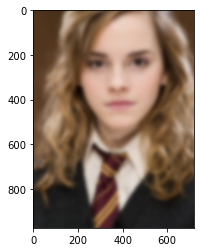

In [70]:
# Show ảnh trên notebook
plt.imshow(result)

In [71]:
# Xuất ra file
output_file = input_file.split('.')[0] + '_blur' + '.png'
Image.fromarray(result).save(output_file)

# Hàm main